In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

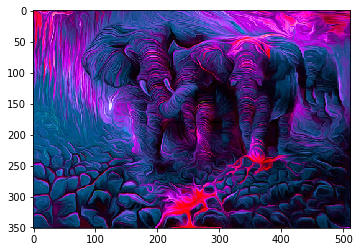

In [2]:
img = cv2.imread("elephant.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [3]:
print(img.shape)

(351, 512, 3)


In [4]:
#flatten each channel of the image in linear array
all_pixels = img.reshape((351*512 , 3))
print(all_pixels.shape)

(179712, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors = 2
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_


In [8]:
centers = np.array(centers, dtype = 'uint8')

In [9]:
centers

array([[ 27,  36,  84],
       [142,  40, 176]], dtype=uint8)

# Plot what all colors are these values?

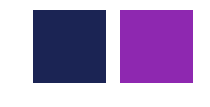

In [10]:
i= 1
colors = []
for each_col in centers:
    plt.subplot(1,4,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    #colors watch
    a = np.zeros((100,100,3), dtype = 'uint8')
    a[:, :, :] = each_col
    plt.imshow(a)
    
plt.show()

# Segmenting original image

In [11]:
new_img = np.zeros((img.shape[0]*img.shape[1],3), dtype = 'uint8')
print(new_img.shape)

(179712, 3)


In [12]:
a = km.labels_
print(len(a))

179712


In [13]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape(img.shape)
print(new_img.shape)

(351, 512, 3)


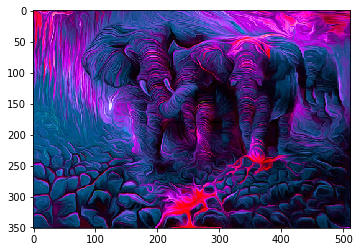

In [14]:
plt.imshow(img)
plt.show()

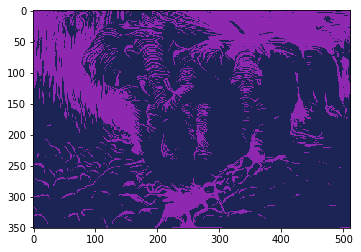

In [15]:
plt.imshow(new_img)
plt.show()